In [1]:
import sys
sys.path.insert(1, '../src')

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
import titanic

In [2]:
df = pd.read_csv('../data/train.csv')
df.set_index('PassengerId', inplace=True)
df = titanic.sex_numeric(df)
df = titanic.name_preprocessing(df)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name,Title,Name Vec
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,braund,mr,"[braund, mr, owen, harris]"
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,cumings,mrs,"[cumings, mrs, john, bradley, florence, briggs..."
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,heikkinen,miss,"[heikkinen, miss, laina]"
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,futrelle,mrs,"[futrelle, mrs, jacques, heath, lily, may, peel]"
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,allen,mr,"[allen, mr, william, henry]"


In [3]:
actual_y = np.array(df['Survived'])
actual_y[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [4]:
enc = OneHotEncoder(sparse=False).fit(X = df[['Embarked']].fillna(''))
col = enc.categories_[0]
print(col)

['' 'C' 'Q' 'S']


In [5]:
emb_df = pd.DataFrame(enc.transform(df[['Embarked']].fillna('')), columns = col, index=df.index)
emb_df.drop(columns = '', inplace=True)
emb_df.head()

,C,Q,S
PassengerId,,,
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0


In [6]:
reg_x = df[['Pclass', 'Sex', 'SibSp', 'Parch']].join(emb_df, how='left')
reg_x.head()

,Pclass,Sex,SibSp,Parch,C,Q,S
PassengerId,,,,,,,
1,3,0,1,0,0.0,0.0,1.0
2,1,1,1,0,1.0,0.0,0.0
3,3,1,0,0,0.0,0.0,1.0
4,1,1,1,0,0.0,0.0,1.0
5,3,0,0,0,0.0,0.0,1.0


In [7]:
model = LogisticRegression().fit(reg_x, actual_y)
print('R2 Score: %.2f' % model.score(reg_x, actual_y))
print('coefficients:', model.coef_)

R2 Score: 0.79
coefficients: [[-0.89214066  2.62856271 -0.20838191 -0.0325352   0.18695698 -0.01567799
  -0.31560844]]


In [8]:
pred_y = model.predict(reg_x)
print(classification_report(actual_y,pred_y))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       549
           1       0.74      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.78       891
weighted avg       0.79      0.79      0.79       891



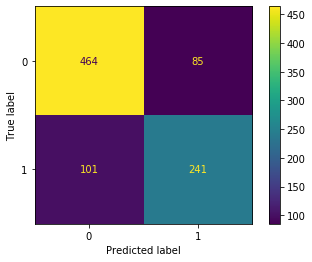

In [9]:
cm = confusion_matrix(actual_y,pred_y)
cm_display = ConfusionMatrixDisplay(cm, [0, 1]).plot(values_format='d')